In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
data = pd.read_csv('data.csv')
data.head()

,S.NO,Spike extension,SPIKE GL PIG,Bristle presence,Spike shape,Spike sterility,Spike density,Seed colour,Seed shape,Days to 50% flowering,Node pigmentation,Leaf sheath length,Leaf blade length,Leaf blade width,Spike length,Spike girth,Plant height,1000 Seed weight,YIELD
0,1.0,1.0,9.0,9.0,8.0,1.0,5.0,5.0,4.0,44,4,11.61,70.45,4.11,18.65,22.77,214.726910,10.54,94.32
1,2.0,1.0,9.0,1.0,1.0,1.0,9.0,8.0,4.0,47,1,13.56,65.51,5.93,11.29,17.22,231.271016,13.44,87.80
2,3.0,1.0,9.0,1.0,8.0,9.0,3.0,5.0,3.0,47,5,13.60,42.34,3.69,31.86,35.55,169.725191,9.27,66.10
3,4.0,1.0,1.0,1.0,9.0,9.0,7.0,8.0,1.0,44,5,9.23,73.12,5.07,20.84,25.91,106.012928,15.00,68.97
4,5.0,3.0,1.0,1.0,7.0,1.0,1.0,8.0,4.0,46,1,11.59,65.52,1.65,27.21,28.85,212.549876,12.02,75.90


In [29]:
data = data.drop(columns=['S.NO'])
data.head()

,Spike extension,SPIKE GL PIG,Bristle presence,Spike shape,Spike sterility,Spike density,Seed colour,Seed shape,Days to 50% flowering,Node pigmentation,Leaf sheath length,Leaf blade length,Leaf blade width,Spike length,Spike girth,Plant height,1000 Seed weight,YIELD
0,1.0,9.0,9.0,8.0,1.0,5.0,5.0,4.0,44,4,11.61,70.45,4.11,18.65,22.77,214.726910,10.54,94.32
1,1.0,9.0,1.0,1.0,1.0,9.0,8.0,4.0,47,1,13.56,65.51,5.93,11.29,17.22,231.271016,13.44,87.80
2,1.0,9.0,1.0,8.0,9.0,3.0,5.0,3.0,47,5,13.60,42.34,3.69,31.86,35.55,169.725191,9.27,66.10
3,1.0,1.0,1.0,9.0,9.0,7.0,8.0,1.0,44,5,9.23,73.12,5.07,20.84,25.91,106.012928,15.00,68.97
4,3.0,1.0,1.0,7.0,1.0,1.0,8.0,4.0,46,1,11.59,65.52,1.65,27.21,28.85,212.549876,12.02,75.90


In [31]:
# Extracting columns that we want to use for clustering
X = data[['Days to 50% flowering', 'Leaf sheath length']].values

In [32]:
# Initializing clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
hierarchical = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.3, min_samples=5)
meanshift = MeanShift()

algorithms = [kmeans, hierarchical, dbscan, meanshift]
algorithm_names = ["K-Means", "Hierarchical", "DBSCAN", "Mean Shift"]

In [34]:
# Calculation of evaluation metrics for each algorithm
for algorithm, name in zip(algorithms, algorithm_names):

    if name != "Hierarchical":
        cluster_labels = algorithm.fit_predict(X)
    else:
        cluster_labels = algorithm.fit(X).labels_

    # Calculation of Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Calculation of Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(X, cluster_labels)

    # Calculation of Calinski-Harabasz Index
    calinski_harabasz = calinski_harabasz_score(X, cluster_labels)

    # Evaluation metrics for the current algorithm
    print(f"Evaluation metrics for {name}:")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print("\n")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluation metrics for K-Means:
Silhouette Score: 0.3552758654277684
Davies-Bouldin Index: 1.010597911905121
Calinski-Harabasz Index: 385.90139964208186


Evaluation metrics for Hierarchical:
Silhouette Score: 0.39956949276984105
Davies-Bouldin Index: 0.8851591359407941
Calinski-Harabasz Index: 355.6037862032244


Evaluation metrics for DBSCAN:
Silhouette Score: -0.07288314076931902
Davies-Bouldin Index: 2.3985591017098846
Calinski-Harabasz Index: 6.531478963269338


Evaluation metrics for Mean Shift:
Silhouette Score: 0.473360354875283
Davies-Bouldin Index: 0.8011656398740922
Calinski-Harabasz Index: 499.0902193394029




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


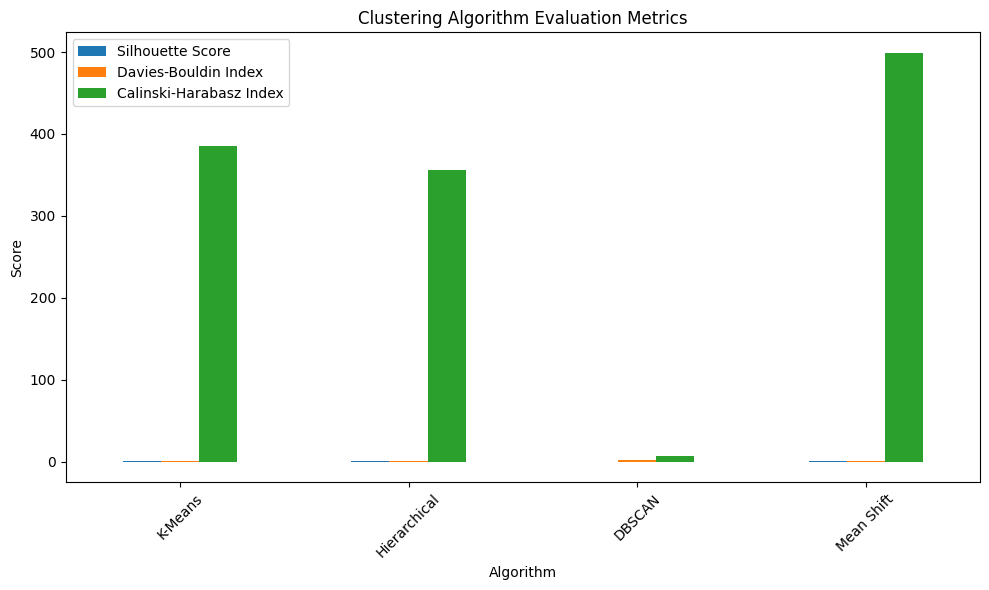

In [35]:
# Creating a bar chart to visualize the metrics
metrics_dict = {
    "Algorithm": algorithm_names,
    "Silhouette Score": [silhouette_score(X, algorithm.fit_predict(X)) for algorithm in algorithms],
    "Davies-Bouldin Index": [davies_bouldin_score(X, algorithm.fit_predict(X)) for algorithm in algorithms],
    "Calinski-Harabasz Index": [calinski_harabasz_score(X, algorithm.fit_predict(X)) for algorithm in algorithms]
}

metrics_df = pd.DataFrame(metrics_dict)

# Plotting the metrics
metrics_df.plot(x="Algorithm", kind="bar", figsize=(10, 6))
plt.title("Clustering Algorithm Evaluation Metrics")
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.tight_layout()
plt.show()
